In this lab, you will implementat a neural network using the Keras library for the Fashion MNIST dataset. 

These are the steps: 

1. Import necessary libraries
2. Load the dataset
3. Print the shape
4. Data Preprocessing:
- Reshape the input data from 28x28 images to a flat vector of size 784.
- Normalize the pixel values to the range [0, 1].
- Convert class labels to one-hot encoded vectors.
5. Build the Neural Network Model
- Create a sequential model using Keras.
- Add a dense layer with 64 neurons and a sigmoid activation function.
- Add an output layer with 10 neurons (for 10 classes) and a softmax activation function.
6. Compile the model using mean squared error as the loss function and stochastic gradient descent (SGD) as the optimizer.
7. Train the model
- Use 100 epochs and a batch size of 128.
8. Display a summary of the model architecture.
9. Evaluate the model on the validation set and print the accuracy.
10. Prot the Confusion Matrix
11. Visualize the Predictions
12. Make predictions on the validation set and display the predicted class probabilities for a specific example.

### Import Libraries: numpy, matplotlib
- from keras.datasets import fashion_mnist
- from keras.models import Sequential
- from keras.layers import Dense
- from tensorflow.keras.optimizers import SGD
- from keras.utils import to_categorical

In [4]:
#from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical


### Load the data into these variables:   (X_train, y_train), (X_valid, y_valid)

In [6]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Print a random image from the dataset
feel free to use: np.random.randint (0, X_train.shape[0])

In [24]:
random_index = np.random.randint(0, X_train.shape[0])


random_image = X_train[random_index].reshape(28, 28)  
random_label = np.argmax(y_train[random_index])  


#### Plot the image 
#### See sample below for sample 39235. Most likely, your image will be different.

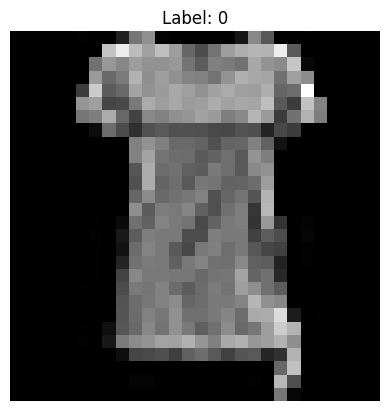

In [27]:
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {random_label}")
plt.axis('off')
plt.show()

#### Confirm image label
#### you will get a number from (0 to 9).

In [31]:
print("Confirmed Label:", random_label)


Confirmed Label: 0


### Plot the image  in a matrix format
Use precision, suppress, and linewidth

In [35]:
print("Image Matrix (28x28):")
print(random_image)


Image Matrix (28x28):
[[  0   0   0   0   0   2   0   0  33 118 144   4   0   0   0   0   0  21
  136  87   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 195 236 188 161 191 157 102  76 115 157 174
  181 180 237  90   0   0   0   0   0   0]
 [  0   0   0   0   0   0 113 151 135 157 146 145 152 116  92 128 123 113
  167 148 139 198   8   0   0   0   0   0]
 [  0   0   0   0   0   0 154 105 123 178 142 158 144 132 129 115 148 175
  168 165 113 159 141   0   0   0   0   0]
 [  0   0   0   0   0  61 203  92 105 164 146 155 168 159 145 162 171 159
  157 174 102 108 255   0   0   0   0   0]
 [  0   0   0   0   0 149 159  70  73 122 171 158 167 155 158 172 161 167
  165 190  90  61 194 132   0   0   0   0]
 [  0   0   0   0   0 118 126 172 103  67 136 129 144 149 161 155 126 136
  181 155  61 113 178 126   0   0   0   0]
 [  0   0   0   0   0   0  12 108  76  47  82  90  82  82  80  73  72  83
   79  37  72  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 129 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   4   1   1   2   3   0   0   0   0  30  63 112 111   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0  26 209 242 255 255 211 255  30   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  85  66  44  31  49  50   0 109 255 223 223 210 197 214 109   0]
 [  0   0   0   0   0   0   0   0   0   5   0  13 191 208 207 204 245 252  30 112 229 216 215 209 218 225 194   0]
 [  0   0   0   0   0   0   0   0   0   2   0  63 190 188 193 208 206 227 167 17

#### Rename the labels (class_names) 
#### from (0,1,2,3...,9) to ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

random_index = np.random.randint(0, X_train.shape[0])


random_image = X_train[random_index].reshape(28, 28)  
random_label_index = np.argmax(y_train[random_index])  
random_label_name = class_names[random_label_index]    


### Print the shape of the train and test images and labes  
i.e. X_train.shape

In [46]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()


print("train_images.shape:", X_train.shape)
print("len(train_labels):", len(y_train))
print("test_images.shape:", X_valid.shape)
print("len(test_labels):", len(y_valid))


train_images.shape: (60000, 28, 28)
len(train_labels): 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [9]:
# It should look like this:

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


#### Plot several images showing the new label

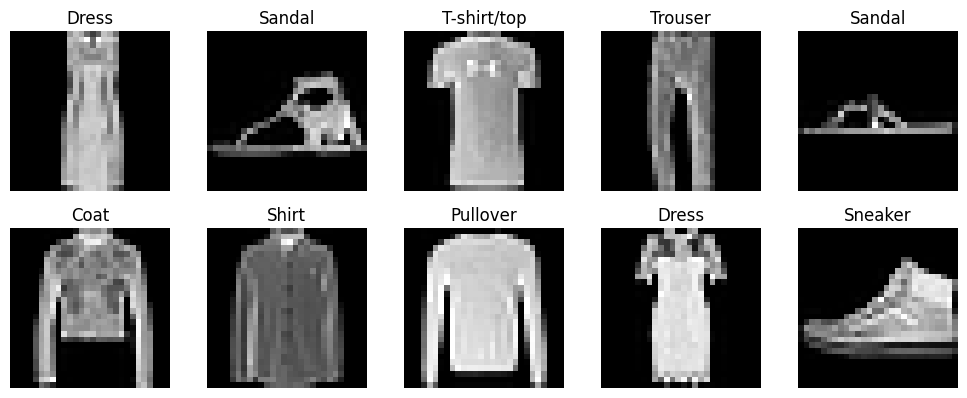

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10, 10))
for i in range(10):
    random_index = np.random.randint(0, X_train.shape[0])
    random_image = X_train[random_index]
    random_label_index = y_train[random_index]
    random_label_name = class_names[random_label_index]
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(random_image, cmap='gray')
    plt.title(random_label_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


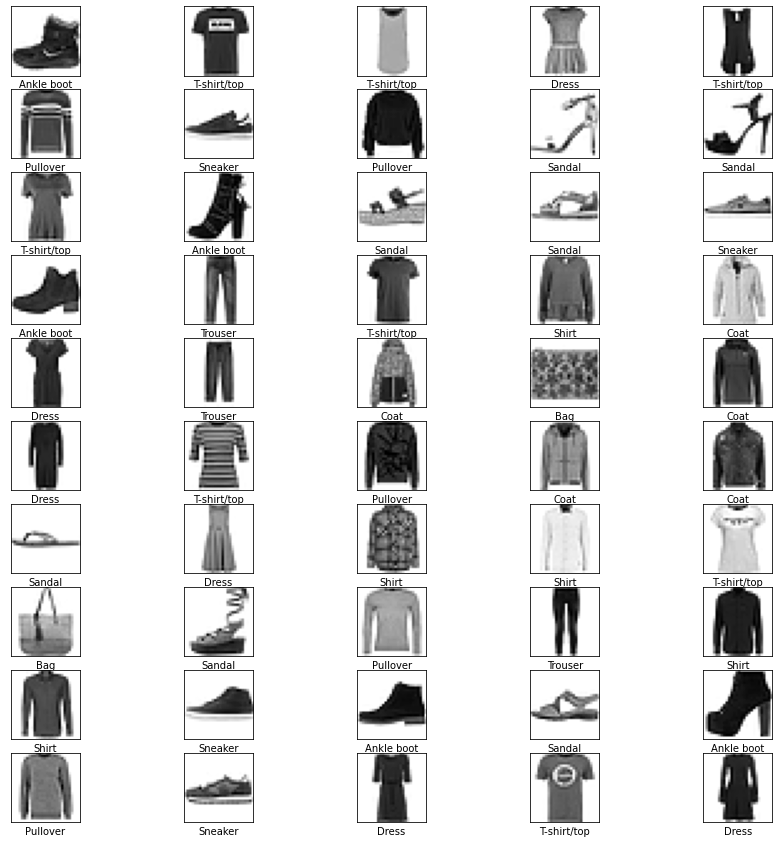

In [10]:
# sample

## Shallow Neural Network in Keras

### Plot some images without the label

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0995 - loss: 0.0969 - val_accuracy: 0.1040 - val_loss: 0.0936
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.1116 - loss: 0.0931 - val_accuracy: 0.1420 - val_loss: 0.0918
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.1492 - loss: 0.0915 - val_accuracy: 0.1695 - val_loss: 0.0906
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.1829 - loss: 0.0905 - val_accuracy: 0.2384 - val_loss: 0.0897
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2570 - loss: 0.0895 - val_accuracy: 0.3021 - val_loss: 0.0889
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.3076 - loss: 0.0887 - val_accuracy: 0.3280 - val_loss: 0.0881
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.3333 - loss: 0.0879 - val_accuracy: 0.3442 - val_loss: 0.0874
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.3476 - loss: 0.0871 - va

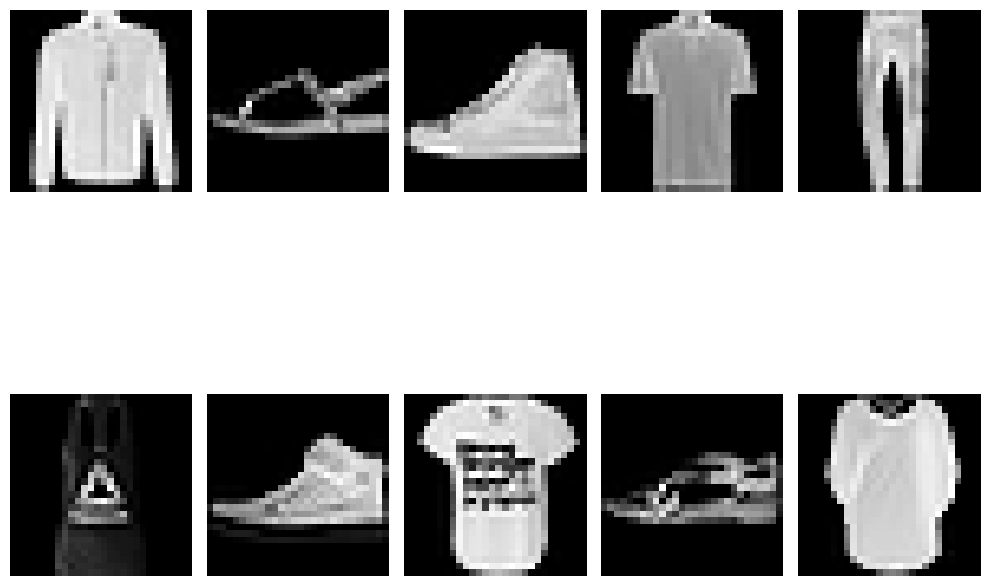

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train.reshape(-1, 784).astype('float32') / 255  
X_test = X_test.reshape(-1, 784).astype('float32') / 255
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)


model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(784,)),
    Dense(10, activation='softmax')
])


model.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))




plt.figure(figsize=(10, 10))
for i in range(10):
    random_index = np.random.randint(0, X_test.shape[0])
    random_image = X_test[random_index].reshape(28, 28)  

    plt.subplot(2, 5, i + 1)
    plt.imshow(random_image, cmap='gray')
    plt.axis('off')  

plt.tight_layout()
plt.show()


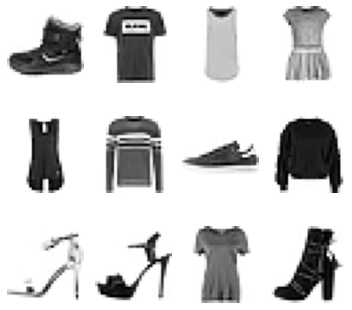

In [12]:
#sample

### Plot the first image
X_valid[0]

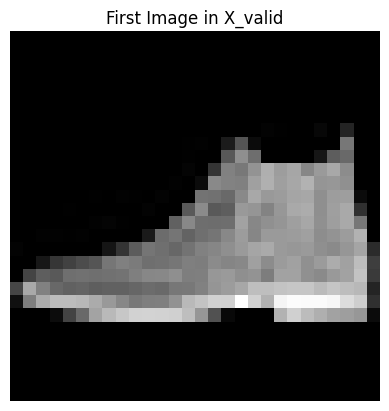

In [59]:
(_, _), (X_valid, y_valid) = fashion_mnist.load_data()

plt.imshow(X_valid[0], cmap='gray')
plt.title("First Image in X_valid")
plt.axis('off')  
plt.show()


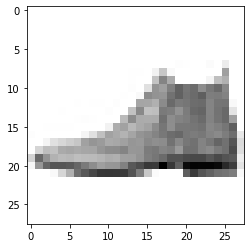

In [13]:
# sample

### Validate that the label is a 9
y_valid[0]

Label for y_valid[0]: 9


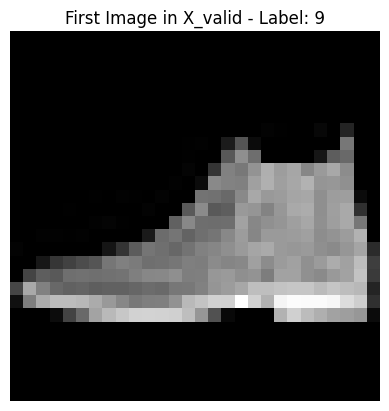

In [61]:
(_, _), (X_valid, y_valid) = fashion_mnist.load_data()


print("Label for y_valid[0]:", y_valid[0])


plt.imshow(X_valid[0], cmap='gray')
plt.title(f"First Image in X_valid - Label: {y_valid[0]}")
plt.axis('off')
plt.show()


### Preprocess data

- After you load in the images, reshape them from a two-dimensional 28x28 shape to a one-dimensional array of 784 elements (28 x 28 = 784)
- Use the as type ('float32') to convert the pixel darknesses from integers into single-precision float values.

### Converting pixel intergers to floats
devide by 255.0

In [65]:
from keras.datasets import fashion_mnist
import numpy as np

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
# Reshape the images to (num_samples, 784) and convert to float32
X_train = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype('float32') / 255.0

# Print the shapes to verify
print("X_train shape:", X_train.shape)  # Should be (60000, 784)
print("X_test shape:", X_test.shape)    # Should be (10000, 784)


X_train shape: (60000, 784)
X_test shape: (10000, 784)


### convert the label y (y_train,y_valid) from integers into one-hot encodings
n_classes = 10

In [68]:
from keras.datasets import fashion_mnist
import numpy as np


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype('float32') / 255.0


print("X_train shape:", X_train.shape)  
print("X_test shape:", X_test.shape)    


X_train shape: (60000, 784)
X_test shape: (10000, 784)


### display the values of y_valid

In [80]:
(_, _), (X_valid, y_valid) = fashion_mnist.load_data()


y_valid_one_hot = to_categorical(y_valid, num_classes=10)


print("One-hot encoded values of y_valid:")
print(y_valid_one_hot)


print("Unique labels in one-hot encoded y_valid:", np.unique(y_valid_one_hot, axis=0))


One-hot encoded values of y_valid:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Unique labels in one-hot encoded y_valid: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
# sample

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Design neural network architecture

- Create a Sequential model and call it "model"
- For the hidden layer, use the add() method with 64 neurons and activation = 'sigmoid' with an input_shape=(784,0)
- For the output layer, use the add() method with 10 neurons and the softmax activation function

### Display the summary of the model and explain what the numbers mean

In [83]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='sigmoid', input_shape=(784,)))


model.add(Dense(10, activation='softmax'))


model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# sample

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Compile the model using:
- loss="categorical_crossentropy"
- Set the cost-minimizing method to stochastic gradient descent by using optimizer = SGD
- Specify the SGD learning rate hyperparameter equals to 0.01
- Set the metrics to 'accurancy' to recieve feedbak on model accurancy

In [91]:
from tensorflow.keras.optimizers import SGD


model.compile(
    loss="categorical_crossentropy",   
    optimizer=SGD(learning_rate=0.01),  
    metrics=['accuracy']                 
)


print("Model compiled successfully.")


Model compiled successfully.


### Training the data 
### Fit the model using a batch_size = 128 and 100 epochs
- model.fit()
- set batch_size = 128
- set verbove = 1
- set epochs = 100
- validate the data

In [98]:
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32') / 255.0
X_valid = X_valid.reshape(X_valid.shape[0], 28 * 28).astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_valid_one_hot = to_categorical(y_valid, num_classes=10)

history = model.fit(
    X_train,          
    y_train_one_hot,  
    batch_size=128,   
    epochs=100,       
    verbose=1,       
    validation_data=(X_valid, y_valid_one_hot)  
)

print("Model training completed.")


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8560 - loss: 0.4020 - val_accuracy: 0.8417 - val_loss: 0.4391
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8606 - loss: 0.3957 - val_accuracy: 0.8424 - val_loss: 0.4385
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8560 - loss: 0.4045 - val_accuracy: 0.8428 - val_loss: 0.4379
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8556 - loss: 0.4046 - val_accuracy: 0.8432 - val_loss: 0.4370
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8581 - loss: 0.3997 - val_accuracy: 0.8432 - val_loss: 0.4364
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8592 - loss: 0.3997 - val_accuracy: 0.8435 - val_loss: 0.4358
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8595 - loss: 0.3966 - val_accuracy: 0.8433 - val_loss: 0.4358
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8586 - loss: 0

### Evaluate the model

### Create a function to prin the confusion matrix
### Feel free to use this function below or do your own one

### Explain the confusion Matrix with your own words

### Import Libraries   
- From collections input Counter
- Import confusion_matrix from sklearn
- import itertoos

In [24]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

In [26]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

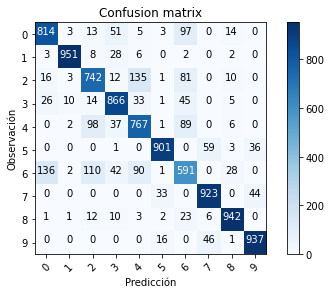

In [29]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

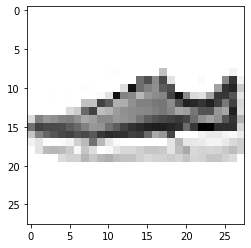

In [44]:
x_test_old = X_valid.reshape(10000, 28,28)
plt.imshow(x_test_old[9], cmap=plt.cm.binary)

In [45]:
predictions = model.predict(X_valid)

In [46]:
np.argmax(predictions[9])

7

In [47]:
print(predictions[9])

[0.   0.   0.   0.   0.   0.01 0.   0.98 0.   0.  ]


In [48]:
np.sum(predictions[9])

1.0

#### Explain the results of the confusion matrix with your own words

The confusion matrix is a valuable tool for visualizing how well your classification model is performing. It breaks down the model’s predictions into a grid where each row represents the actual classes of the data and each column shows the predicted classes. The diagonal cells, from the top left to the bottom right, indicate the number of correct predictions made by the model—these are your true positives (TP). For example, if the model correctly identified 500 instances of the class '7', you’d see that number in the intersection of row 7 and column 7. On the other hand, the off-diagonal values in a row represent instances where the model made incorrect predictions, known as false positives (FP). For instance, if a true '3' was incorrectly predicted as a '7', that would appear in the row for '3' and the column for '7'. Similarly, the off-diagonal values in a column show false negatives (FN), which are true instances that were misclassified. So, if a true '3' was classified as a '7', it would be reflected in the column for '7' but in the row for '3'. You can also normalize the confusion matrix to show the percentage of correct predictions, making it easier to compare performance across different classes, especially when they are imbalanced. Ideally, a strong model will have high values in the diagonal cells, showing that it’s making accurate predictions, while the off-diagonal values should be low, indicating minimal misclassifications. For example, if your matrix shows that most T-shirts and trousers are classified correctly, but there are some instances where T-shirts are misclassified as trousers, it highlights that while the model is generally effective, there are specific areas—like distinguishing between T-shirts and trousers—that need improvement.

#### Finally, Plot the ReLU function

## The Rectified Linear Unit function

The Rectified Linear Unit (ReLU) function is another one of the most commonly used
activation functions. It outputs a value from o to infinity. It is basically a piecewise function
and can be expressed as follows: 
    

$$ f(x)=\left\{\begin{array}{ll}{0} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0}\end{array}\right.$$
               
               
That is, $f(x)$ returns zero when the value of x is less than zero and $f(x)$ returns x when the
value of x is greater than or equal to zero. It can also be expressed as follows: 

$$ f(x)=\max (0, x)$$


#### Create a ReLU function

In [103]:
def ReLU(x):
    if x<0:
        return 0
    else:
        return x

#### Test the function with a positve value and a negative value

In [106]:
#Postivie
positive_test = ReLU(5)

print(f'ReLU(5) = {positive_test}')


ReLU(5) = 5


In [108]:
#Negative
negative_test = ReLU(-3)

print(f'ReLU(-3) = {negative_test}')


ReLU(-3) = 0


### Plot the ReLU function.

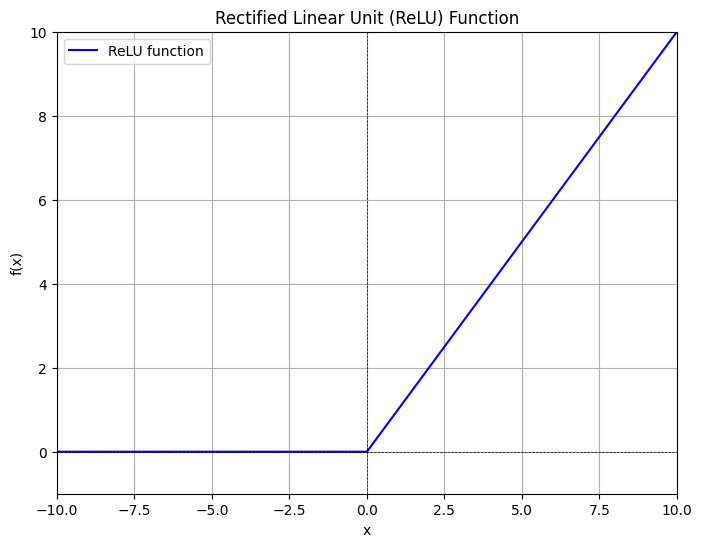

In [111]:
x_values = np.linspace(-10, 10, 400)  
y_values = [ReLU(x) for x in x_values]  

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='ReLU function', color='blue')
plt.title('Rectified Linear Unit (ReLU) Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')  
plt.axvline(0, color='black', lw=0.5, ls='--')  
plt.grid()
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-1, 10)
plt.show()
